# Métodos III - Integrals

## Cuestiones sobre integración en varias dimensiones


**Course: "Métodos III - Integrals in two and three dimensions"**

*Author: Jose A. Hernando*, March 2018

*Particle Physics Deparment. Universidade de Santiago de Compostela, Spain.*

In [82]:
# general imports
%matplotlib inline
# un-comment this line to have interactive plots
#%matplotlib notebook

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')


---

## Integrales en 1D

**Ejercicio: ** Has una partición del intervalo [0, $\pi$] en 10 sub-intervalos de igual tamaño.

Las siguientes celdas muestras como hacer una partición y cómo generar números aleatorios con una distribución uniforme en el intervalo [0., 1.], usando el módulo *random* de *numpy*.

In [87]:
# partición del intervalo [0., pi] en n intervalos
n = 10
xs = np.linspace(0., np.pi, n+1)
print('Partición :', xs)

Partición : [ 0.          0.31415927  0.62831853  0.9424778   1.25663706  1.57079633
  1.88495559  2.19911486  2.51327412  2.82743339  3.14159265]


In [88]:
# generador de números aleatorios con una distribución uniforme
# generar m números aleatorios entre [0., 1.]
m = 4
ts = np.random.uniform(size = m)
print('números aleatorios ', ts)

números aleatorios  [ 0.175216    0.39937715  0.24912288  0.97591598]


Riemann ideó una forma de calcular el aréa bajo la gráfica de una función $f(x)$ en el intervalo $[a, b]$, mediante la división del intervalo en sub-intervalos (o sea hacer una partición), construir polígonos con base la anchura de los subintervalos y la altura un valor al alzar de la curva en ese subintervalo, y aproximar el área a la suma de las áreas de los polígonos. Llamo suma (de Riemann) al área de todos los polígonos. En su visión, conforme más fina sea la participión, más pequeños los intervalos, y más precisa es el cálculo del área a partir de su suma. 

Esta es la entrada sobre Riemann en la Wikipedia: https://es.wikipedia.org/wiki/Bernhard_Riemann


**Ejemplo:** El siguiente gráfico muestra la suma de Riemann de la función $f(x) = \cos(x)$ en $[0, \pi]$ con una partipición regular en 10 sub-intervalos.

**Ejercicio:** Calcula la suma de Riemann para la función: $f(x) = \cos(x)$ en el intervalo [0, $\pi$]

**Cuestión:** Si hacemos particiones del intervalo [0, $\pi$] cada vez más pequeñas, por ejemplo en 100, 1000, 1000 sub-intervalos iguales, ¿cómo cambia la suma de Riemman?, ¿Converge?

**Cuestión:** Para este ejemplo podrías dar la suma superior e inferior de Riemman. Indica para cad partición el valor de las tres sumas.



tamaño del sub-intervalo :  0.314159265359
Suma de Riemann 2.06952635608


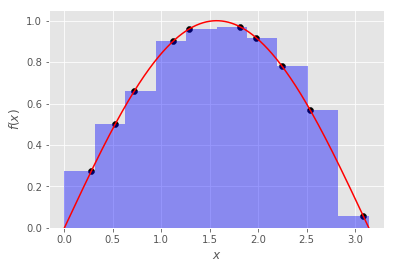

In [102]:
# Partición del intervalo [0, pi] en n-subintervalos
n = 10
xs = np.linspace(0., np.pi, n+1)
# los sub-intervalos tienen todos el mismo tamaño, delta_x
delta_x = xs[1]-xs[0]
print('tamaño del sub-intervalo : ', delta_x)
# generamos n números aleatorios
ts = np.random.uniform(size=n)

# calculamos un punto aleatorio en cada subintervalo
xts = np.array([xs[i]+ts[i]*delta_x for i in range(n)])
# y el valor de la función en esos puntos
yts = np.sin(xts)

# dibujamos la función con detalle
fig, ax = plt.subplots()
xxs = np.linspace(0., np.pi, 1000)
ax.plot(xxs, np.sin(xxs), color='red')

# Ahora dibujamos los puntos aleatorios
ax.scatter(xts, yts, color='black')

# Y los polígonos de la suma de Riemman
xcenters = (xs[1:]+xs[:-1])/2.
ax.bar(xcenters, yts, width=delta_x, color='blue', 
           alpha=0.4, label='S.R.');
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

# E imprimimos el valor de la suma de Riemman
print('Suma de Riemann', np.sum(yts*delta_x))


**Cuestión:** Repetir el ejercicio para la función $f(x)= \sin(x)$ en $[0, \pi/2]$ y en $[-\pi/2, \pi/2]$. 

## Symbolic Python (Sympy)

*Sympy* es un paquete de Python que permite realizar cálculos simbólicos y valorarlos en determinados casos. En particular puede calcular integrales.

Esta aquí en Scipy!: https://www.scipy.org. ¡Viene con la distribución de Anaconda! 

### Integrales definidas

El siguiente ejemplo muestra como hacer la integral dfinida de la función $f(x)=\sin(x)$ en $[0, \pi/2]$

In [103]:
import sympy as sp
x = sp.Symbol('x')
val = sp.integrate(sp.sin(x), (x, 0, np.pi/2.)) 
print('value of the integral ', val)

value of the integral  1.00000000000000


### Integrales indefinidas

El siguiente código usando Simpy (sp) muestra como hacer simbólicamente integrales indefinidas

In [107]:
sp.integrate(sp.sin(x))

-cos(x)

**Ejercicio:** Integra simbólicamente $f(x) = 3x^2+2x+1$, $$f(x) = \exp(-x)$, $f(x) = 1/\cos^2(x)$, $f(x) = x^2/(x^2-1)$, $f(x) = 1/(1+x^2)$, $f(x) = 1/x$, $f(x) = 1/\sqrt{1-x^2}$

In [113]:
sp.integrate(3*x*x+2*x+1)

x**3 + x**2 + x

In [111]:
sp.integrate(1/(sp.cos(x)*sp.cos(x)))

sin(x)/cos(x)

# Integrales es dos dimensiones

In [112]:
sp.integrate(x*x/(x*x-1))

x + log(x - 1)/2 - log(x + 1)/2

**Ejemplo:** La siguiente figura muestra la gráfica de la función $f(x,y) = \cos(x) \cos(y)$ en la región $R = [0, \pi/2] \times [0, \pi/2]$. 

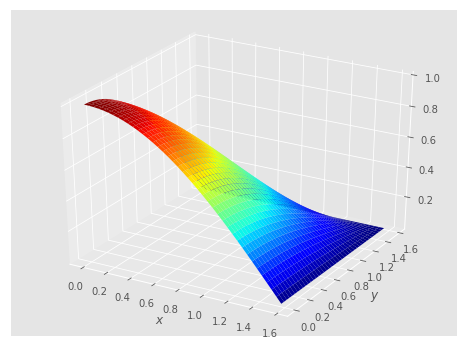

In [117]:
# calculamos una partición en sub-rectángulo
n = 40
a, b = 0., np.pi/2.
c, d = 0., np.pi/2.
xs   = np.linspace(a, b, n+1)
ys   = np.linspace(c, d, n+1)
# los tamaños de los lados de los sub-rectángulos son:
delta_x = xs[1]-xs[0]
delta_y = ys[1]-ys[0]

# Construimos ahors dos matrices X, Y (por comodidad) de tamaño (n, n)
# que tienen X[i, j] = x_i, y Y[i, j] = y_j
X, Y = np.meshgrid(xs, ys, indexing='ij')

# calculamos el valor de la función para el extremo inferior de cada sub-rectángulo
Z = np.cos(X)* np.cos(Y)
# Ahora Z es una matrix (n, n), con Z[i, j] = cos(x_i) cos(y_j)

# Ahora dibujamos la gráfica de la función
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, Z, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

La siguiente figura muestra la misma función $f(x, y) = \cos(x) \cos(y)$ pero construida a partir de poliedros, donde la base sub-rectángulos y la altura el valor de la función en la esquina inferior del sub-rectángulo.

**Ejercicio:** Si hacemos una partición de la región $[0, \pi/2] \times [0, \pi/2]$ ¿Serías capaz de dar en cada sub-rectángulo (o sub-cuadrado si es el caso) un punto $(x, y)$ aleatorio?

**Cuestión:** ¿Podrías extender el concepto de Suma de Riemman a 2D? ¿Cómo calcularías el volumen que hay debajo de la gráfica?

**Ejercicio:** Calcula la suma de Riemman para esta función y usa particiones cada vez más finas. ¿Cuál será el valor de la integral en 2D?

In [124]:
# esta es una función auxiliar para dibujar la función como barritas
def plot_bar3d(X, Y, Z, delta_x, delta_y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    xm = X.flatten()
    ym = Y.flatten()
    ndim = len(xm)
    zm = np.zeros(ndim)
    dx = delta_x*np.ones(ndim)
    dy = delta_y*np.ones(ndim)
    dz = Z.flatten()
    cmap = plt.cm.jet
    norm = plt.Normalize()
    cols = cmap(norm(dz))
    sf = ax.bar3d(xm, ym, zm, dx, dy, dz, color=cols, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$y$', fontsize=14)
    ax.set_zlabel('$z$', fontsize=14)
    ax.set_xlim([np.min(xs), np.max(xs)])
    ax.set_ylim([np.min(ys), np.max(ys)])
    # fig.colorbar(sf, ax=ax)
    fig.tight_layout()
    return fig, ax

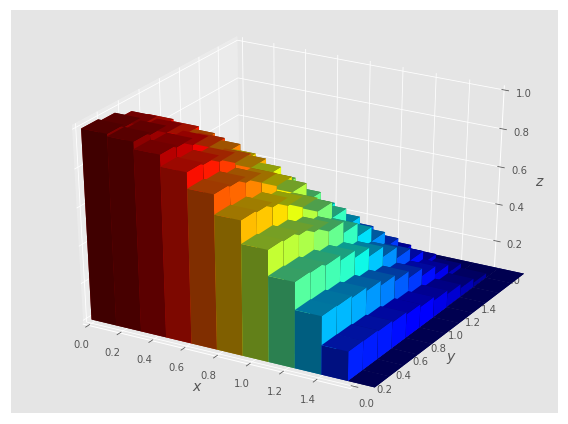

In [125]:
# calculamos una partición en sub-rectángulo
n = 10
a, b = 0., np.pi/2.
c, d = 0., np.pi/2.
xs   = np.linspace(a, b, n+1)
ys   = np.linspace(c, d, n+1)
# los tamaños de los lados de los sub-rectángulos son:
delta_x = xs[1]-xs[0]
delta_y = ys[1]-ys[0]

# Construimos ahors dos matrices X, Y (por comodidad) de tamaño (n, n)
# que tienen X[i, j] = x_i, y Y[i, j] = y_j
X, Y = np.meshgrid(xs, ys, indexing='ij')

# calculamos el valor de la función para el extremo inferior de cada sub-rectángulo
Z = np.cos(X)* np.cos(Y)

# dibuja la función como barritas (se paciente, es lento)
fig, ax = plot_bar3d(X, Y, Z, delta_x, delta_y)

**Cuestión**: Fijate en los polígonos para un $x$ dado (por ejemplo $x=1)$ ¿Ves que hay una sección de la figura? ¿Cuál sería el area de la sección? (si no lo ves pasa al siguiente...)

**Ejercicio:** Calcula ahora el volumen bajo la gráfica de la función $f(x,y) =x+y$ en la región $[0, 1]\times[0, 1]$? y ¿de $f(x, y) = x-y+1$?

## Cálculo de la longitud de arco

La siguiente figura muestra la curva ${\bf r}(t) = (t, t^2)$ entre $[0, 1]$. 

**Cuestión:** ¿Puedes calcular la longitud de la curva? ¿Podrías usar una partición del intervalo y calcular para cada sub-intervalo la distance entre los puntos (x, y) de sus extremos? 

**Ejercicio:** Calcula ahora la longitud de la curva dada por ${\bf r}(t) = (\cos t, \sin t)$ entre $[0, 2\pi]$


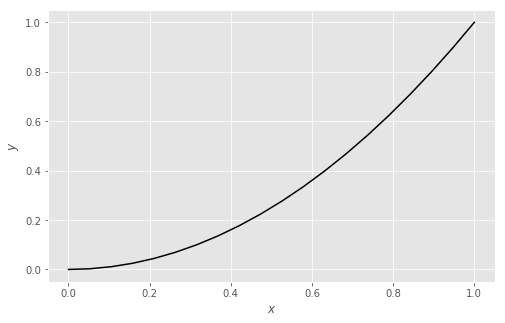

In [129]:
n = 20
ts = np.linspace(0., 1, n)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ts, ts*ts, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Cálculo del área de una superficie

**Cuestión:** Dibuja dos vectores, por ejemplo, $(1, 1)$ y $(-1, 1)$, ¿A qué corresponde el módulo de su producto vectorial? ¿Y la dirección de éste?

**Cuestión:** ¿Es lo mismo válido para tres dimensiones?

(-2.0, 2.0)

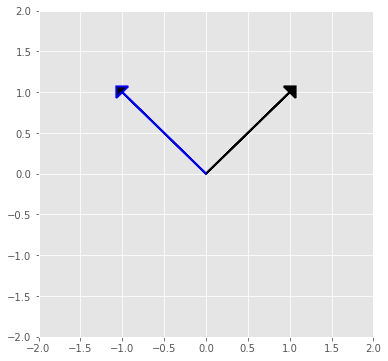

In [152]:
ux, uy =    1., 1.
vx, vy =   -1., 1.
fig, ax = plt.subplots(figsize=(6, 6))
hl = 0.1
ax.arrow(0., 0., ux , uy, head_width=0.2, head_length=hl, fc='k', color='black', lw=2)
ax.arrow(0., 0., vx , vy, head_width=0.2, head_length=hl, fc='k', color='blue', lw=2)
ax.set_xlim(-2., 2.)
ax.set_ylim(-2., 2.);
#ax.arrow(1, 1, vx, vy, head_width=0.5, head_length=0.3,  fc='k', color='blue', lw=2);

**Cuestión**: La siguiente figura es la gráfica de la función $f(x, y) = cos(x) sin(y)$ en la región $[0, \pi/2] \times [0, \pi/2]$, observa que la superficie está dibujada con pequeñas 'teselas' ¿Podrías calcular para cada una de ellas los dos vectores que dan sus lados? ¿Cuál será el área de cada una de ellas? ¿Y el área de la superficie total? 

**Ejercicio:** Podrías calcular el área de la gráfica de $f(x, y) = x+y$ en la región $[0, 1] \times [0, 1]$

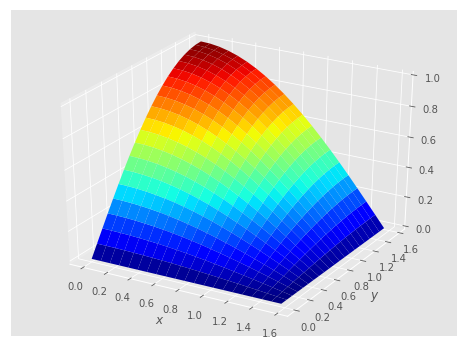

In [154]:
# calculamos una partición en sub-rectángulo
n = 20
a, b = 0., np.pi/2.
c, d = 0., np.pi/2.
xs   = np.linspace(a, b, n+1)
ys   = np.linspace(c, d, n+1)
# los tamaños de los lados de los sub-rectángulos son:
delta_x = xs[1]-xs[0]
delta_y = ys[1]-ys[0]

# Construimos ahors dos matrices X, Y (por comodidad) de tamaño (n, n)
# que tienen X[i, j] = x_i, y Y[i, j] = y_j
X, Y = np.meshgrid(xs, ys, indexing='ij')

# calculamos el valor de la función para el extremo inferior de cada sub-rectángulo
Z = np.cos(X)* np.sin(Y)
# Ahora Z es una matrix (n, n), con Z[i, j] = cos(x_i) cos(y_j)

# Ahora dibujamos la gráfica de la función
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, Z, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Sympy integrales en 2D

El siguiente código muestra un ejemplo de cómo integrar con Sympy funciones 2D. Sea $f(x, y) = axy+by$

**Cuestión:** Integra primero en $x$ y luego en $y$, luego, invierte el orden de integración, primero integra en $y$ y luego en $x$. ¿Obtienes el mismo resultado?

In [168]:
x = sp.Symbol('x')
y = sp.Symbol('y')
a = sp.Symbol('a')
b = sp.Symbol('b')

fxy = a*x*y+b*y
print('función a integrar  :', fxy)
print('integral respecto x :', sp.integrate(fxy, x))
print('integral respecto y :', sp.integrate(fxy, y))
print('integral en x e y   :', sp.integrate(fxy, x, y))

función a integrar  : a*x*y + b*y
integral respecto x : a*x**2*y/2 + b*x*y
integral respecto y : y**2*(a*x/2 + b/2)
integral en x e y   : y**2*(a*x**2/4 + b*x/2)


**Ejemplo:** Integra $f(x, y) = \cos(x)\cos(y)$ en el intervalo $[0, \pi/2] \times [0, \pi/2]$

In [171]:
x = sp.Symbol('x')
y = sp.Symbol('y')
sp.integrate(sp.cos(x)*sp.cos(y), (x, 0, np.pi/2), (y, 0, np.pi/2))

1.00000000000000

**Ejercicio:** Integra $f(x, y) = \cos(x) \sin(y)$ en el intervalo $[0, \pi/2] \times [0, \pi/2]$